<a href="https://colab.research.google.com/github/Jenny000327/Data_analysis/blob/main/5_%EC%87%BC%ED%95%91%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%8A%B8_%EB%B6%84%EC%95%BC_%EB%82%B4_%EC%97%B0%EB%A0%B9%EB%B3%84_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EC%A1%B0%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 쇼핑 인사이트 분야 내 연령별 트렌드 조회

In [ ]:
import requests
import json

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/shopping/category/age"

headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
    'Content-Type': 'application/json'
}

data = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "week",
    "category": "50000167",
    "device": "mo",
    "ages": ["10", "20", "30", "40", "50", "60"]
}

response = requests.post(url, headers=headers, data=json.dumps(data))

if response.status_code == 200:
    result = response.json()
    print(result)
else:
    print("Error {}: {}".format(response.status_code, response.text))


{'startDate': '2022-12-26', 'endDate': '2023-03-05', 'timeUnit': 'week', 'results': [{'title': '50000167', 'category': ['50000167'], 'data': [{'period': '2022-12-26', 'ratio': 1.60208, 'group': '10'}, {'period': '2022-12-26', 'ratio': 24.08771, 'group': '20'}, {'period': '2022-12-26', 'ratio': 62.60522, 'group': '30'}, {'period': '2022-12-26', 'ratio': 88.46151, 'group': '40'}, {'period': '2022-12-26', 'ratio': 48.63548, 'group': '50'}, {'period': '2022-12-26', 'ratio': 11.33839, 'group': '60'}, {'period': '2023-01-02', 'ratio': 1.28397, 'group': '10'}, {'period': '2023-01-02', 'ratio': 21.96826, 'group': '20'}, {'period': '2023-01-02', 'ratio': 61.57839, 'group': '30'}, {'period': '2023-01-02', 'ratio': 89.56406, 'group': '40'}, {'period': '2023-01-02', 'ratio': 53.72485, 'group': '50'}, {'period': '2023-01-02', 'ratio': 13.5604, 'group': '60'}, {'period': '2023-01-09', 'ratio': 1.40101, 'group': '10'}, {'period': '2023-01-09', 'ratio': 21.40105, 'group': '20'}, {'period': '2023-01-09

### 데이터 프레임 형식.

In [ ]:

import requests
import json
import pandas as pd

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/shopping/category/age"

headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
    'Content-Type': 'application/json'
}

data = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "week",
    "category": "50000167",
    "device": "mo",
    "ages": ["10", "20", "30", "40", "50", "60"]
}

response = requests.post(url, headers=headers, data=json.dumps(data))

if response.status_code == 200:
    result = response.json()

    # 응답 JSON 데이터에서 필요한 정보 추출하기
    start_date = result['startDate']
    end_date = result['endDate']
    time_unit = result['timeUnit']

    data = []
    for res in result['results']:
        title = res['title']
        category = res['category'][0] if res['category'] else ''

        for item in res['data']:
            period = item['period']
            group = item['group']
            ratio = item['ratio']

            data.append([start_date, end_date, time_unit, title, category, period, group, ratio])

    # pandas DataFrame 형식으로 변환하기
    columns = ['start_date', 'end_date', 'time_unit', 'title', 'category', 'period', 'group', 'ratio']
    df = pd.DataFrame(data, columns=columns)

    # 결과 확인하기
    print(df.head())
else:
    print("Error {}: {}".format(response.status_code, response.text))


   start_date    end_date time_unit     title  category      period group  \
0  2022-12-26  2023-03-05      week  50000167  50000167  2022-12-26    10   
1  2022-12-26  2023-03-05      week  50000167  50000167  2022-12-26    20   
2  2022-12-26  2023-03-05      week  50000167  50000167  2022-12-26    30   
3  2022-12-26  2023-03-05      week  50000167  50000167  2022-12-26    40   
4  2022-12-26  2023-03-05      week  50000167  50000167  2022-12-26    50   

      ratio  
0   1.60208  
1  24.08771  
2  62.60522  
3  88.46151  
4  48.63548  


### 시각화

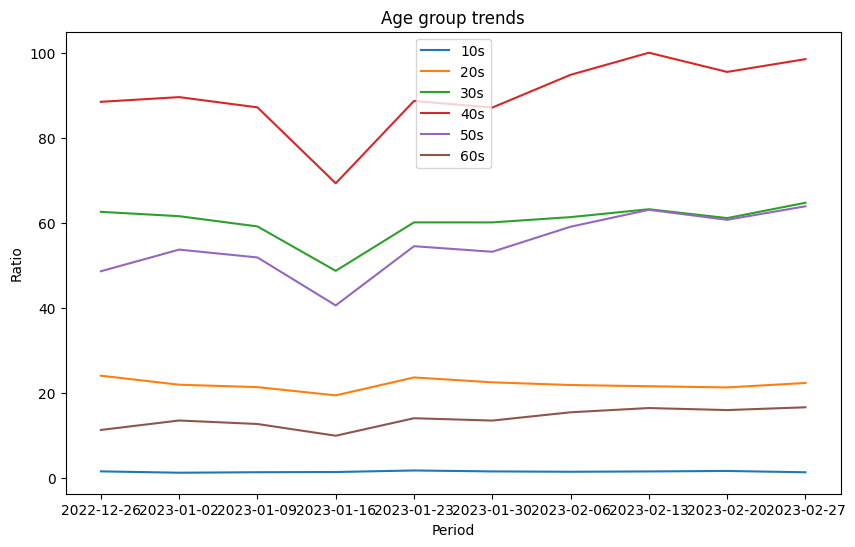

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/shopping/category/age"

data = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "week",
    "category": "50000167",
    "device": "mo",
    "ages": ["10", "20", "30", "40", "50", "60"]
}

headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
    'Content-Type': 'application/json'
}

response = requests.post(url, headers=headers, data=json.dumps(data))

# 응답 JSON 데이터에서 필요한 정보 추출하기
start_date = response.json()['startDate']
end_date = response.json()['endDate']
time_unit = response.json()['timeUnit']

data = []
for result in response.json()['results']:
    title = result['title']
    category = result['category'][0] if result['category'] else ''

    for item in result['data']:
        period = item['period']
        group = item['group']
        ratio = item['ratio']

        data.append([start_date, end_date, time_unit, title, category, period, group, ratio])

# pandas DataFrame 형식으로 변환하기
columns = ['start_date', 'end_date', 'time_unit', 'title', 'category', 'period', 'group', 'ratio']
df = pd.DataFrame(data, columns=columns)

# 연령 그룹별 비율 추출
df_age = df.pivot_table(index='group', columns='period', values='ratio')

# 차트 그리기
plt.figure(figsize=(10, 6))

for age in df_age.index:
    plt.plot(df_age.columns, df_age.loc[age], label=str(age)+'s')

plt.title('Age group trends')
plt.xlabel('Period')
plt.ylabel('Ratio')
plt.legend()
plt.show()


# 성별, 연령별 쇼핑 트렌드 두개 썪어보기.

In [ ]:
import requests
import json
import pandas as pd

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

url_gender = "https://openapi.naver.com/v1/datalab/shopping/category/gender"
url_age = "https://openapi.naver.com/v1/datalab/shopping/category/age"

headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

def get_data(url, params):
    res = requests.post(url, headers=headers, data=json.dumps(params))
    if res.status_code == 200:
        return res.json()
    else:
        raise ValueError("API request failed with status code:", res.status_code)

# 성별 데이터 조회 예제
params_gender = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "week",
    "category": "50000000",
    "device": "",
    "gender": "",
    "ages": []
}

res_gender = get_data(url_gender, params_gender)

df_gender = pd.DataFrame(columns=["start_date", "end_date", "category", "gender", "ratio"])

for data in res_gender["results"][0]["data"]:
    start_date = data["period"]
    end_date = pd.date_range(start=start_date, periods=7, freq='D')[-1].strftime("%Y-%m-%d")
    category = res_gender["results"][0]["title"]
    gender = data["group"]
    ratio = data["ratio"]
    df_gender.loc[len(df_gender)] = [start_date, end_date, category, gender, ratio]

print(df_gender)

# 연령별 데이터 조회 예제
params_age = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "week",
    "category": "50000000",
    "device": "",
    "gender": "",
    "ages": ["20", "30"]
}

res_age = get_data(url_age, params_age)

df_age = pd.DataFrame(columns=["start_date", "end_date", "category", "age", "ratio"])

for data in res_age["results"][0]["data"]:
    start_date = data["period"]
    end_date = pd.date_range(start=start_date, periods=7, freq='D')[-1].strftime("%Y-%m-%d")
    category = res_age["results"][0]["title"]
    age = data["group"]
    ratio = data["ratio"]
    df_age.loc[len(df_age)] = [start_date, end_date, category, age, ratio]

print(df_age)


    start_date    end_date  category gender      ratio
0   2022-12-26  2023-01-01  50000000      f   74.24721
1   2022-12-26  2023-01-01  50000000      m   25.67354
2   2023-01-02  2023-01-08  50000000      f   75.86247
3   2023-01-02  2023-01-08  50000000      m   25.03461
4   2023-01-09  2023-01-15  50000000      f   72.95191
5   2023-01-09  2023-01-15  50000000      m   22.73886
6   2023-01-16  2023-01-22  50000000      f   59.76853
7   2023-01-16  2023-01-22  50000000      m   19.08647
8   2023-01-23  2023-01-29  50000000      f   76.84996
9   2023-01-23  2023-01-29  50000000      m   24.13505
10  2023-01-30  2023-02-05  50000000      f   76.43676
11  2023-01-30  2023-02-05  50000000      m   22.63894
12  2023-02-06  2023-02-12  50000000      f   82.01690
13  2023-02-06  2023-02-12  50000000      m   23.29417
14  2023-02-13  2023-02-19  50000000      f   87.81608
15  2023-02-13  2023-02-19  50000000      m   23.84025
16  2023-02-20  2023-02-26  50000000      f   89.88636
17  2023-0

### 시간별 성별 검색 비율에 대한 시각화 

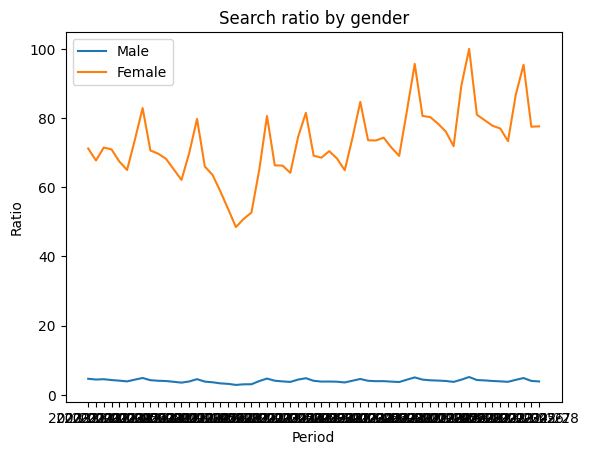

In [ ]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/shopping/category/gender"

headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

data = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "date",
    "category": "50000167",
    "device": "",
    "gender": "",
    "ages": []
}

response = requests.post(url, headers=headers, data=json.dumps(data))
result = response.json()

df = pd.json_normalize(result['results'][0]['data'])

plt.plot(df[df['group'] == 'm']['period'], df[df['group'] == 'm']['ratio'], label='Male')
plt.plot(df[df['group'] == 'f']['period'], df[df['group'] == 'f']['ratio'], label='Female')

plt.title('Search ratio by gender')
plt.xlabel('Period')
plt.ylabel('Ratio')
plt.legend()

plt.show()


### 쇼핑분야 내 연령별 검색 비율에 대한 시각화

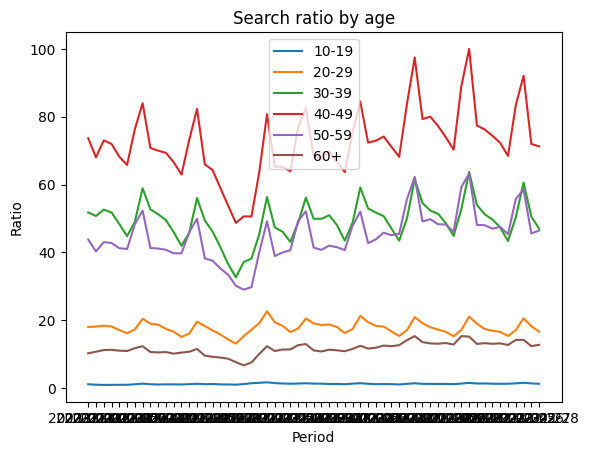

In [ ]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/shopping/category/age"

headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

data = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "date",
    "category": "50000167",
    "device": "",
    "gender": "",
    "ages": []
}

response = requests.post(url, headers=headers, data=json.dumps(data))
result = response.json()

df = pd.json_normalize(result['results'][0]['data'])

plt.plot(df[df['group'] == '10']['period'], df[df['group'] == '10']['ratio'], label='10-19')
plt.plot(df[df['group'] == '20']['period'], df[df['group'] == '20']['ratio'], label='20-29')
plt.plot(df[df['group'] == '30']['period'], df[df['group'] == '30']['ratio'], label='30-39')
plt.plot(df[df['group'] == '40']['period'], df[df['group'] == '40']['ratio'], label='40-49')
plt.plot(df[df['group'] == '50']['period'], df[df['group'] == '50']['ratio'], label='50-59')
plt.plot(df[df['group'] == '60']['period'], df[df['group'] == '60']['ratio'], label='60+')

plt.title('Search ratio by age')
plt.xlabel('Period')
plt.ylabel('Ratio')
plt.legend()

plt.show()
